# Hotel Booking Demand

### Importing Libraries and data

In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Avoiding unneccessary warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('hotel_bookings.csv.zip')

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Descriptive Info and Statistics

In [17]:
df.shape

(119390, 32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Checking and Dealing With Missing Values

In [20]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
# Checking missing value counts of each column by percentage
print('Missing Value Percentage of Columns')
print('--------------------------')
round(df.isnull().sum()/df.shape[0]*100, 2).sort_values(ascending=False)

Missing Value Percentage of Columns
--------------------------


company                           94.31
agent                             13.69
country                            0.41
hotel                              0.00
previous_cancellations             0.00
reservation_status                 0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
assigned_room_type                 0.00
reserved_room_type                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_week_nights               0.00


In [22]:
print('--------------------------')

--------------------------


**According to the research paper attached to the dataset it can be noted that NULL here, does not mean missing value, rather it mean Not Applicable.**

In [23]:
df['agent'] = df['agent'].fillna('Not Applicable')
df['company'] = df['company'].fillna('Not Applicable')
df['country'] = df['country'].fillna('Unknown')

In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Screening Each Column

In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
# Examining hotel column
print('Checking hotel column')
print('--------------------------')
print(df['hotel'],'\n\n')
print('Number of each values')
print('--------------------------')
print(df['hotel'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(df['hotel'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(df['hotel'].dtype,'\n\n')

Checking hotel column
--------------------------
0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object 


Number of each values
--------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




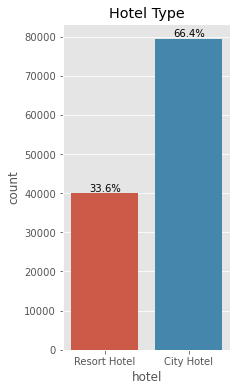

In [88]:
plt.figure(figsize = (3,6))
ax=sns.countplot(df['hotel'])
plt.title('Hotel Type')
total = float(len(df))
patches = ax.patches
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()*.5
    y = p.get_height()*1.009
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [28]:
# Examining is_canceled column
print('Checking is_canceled column')
print('--------------------------')
print(df['is_canceled'],'\n\n')
print('Number of each values')
print('--------------------------')
print(df['is_canceled'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(df['is_canceled'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(df['is_canceled'].dtype,'\n\n')

Checking is_canceled column
--------------------------
0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64 


Number of each values
--------------------------
0    75166
1    44224
Name: is_canceled, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
int64 


